In [3]:
import numpy as np
import pylab as plt
from scipy import stats

In [76]:
s1 = stats.gamma.rvs(6, scale=1, size=(100))
s2 = stats.gamma.rvs(1, scale=6, size=(100))

In [77]:
s1.mean(), s2.mean()

(5.964489096305947, 6.506117361057951)

(array([0.13395173, 0.1004638 , 0.06697587, 0.1004638 , 0.1004638 ,
        0.1004638 , 0.06697587, 0.07813851, 0.04465058, 0.02232529,
        0.05581322, 0.05581322, 0.05581322, 0.04465058, 0.01116264,
        0.        , 0.01116264, 0.        , 0.01116264, 0.        ,
        0.        , 0.01116264, 0.        , 0.        , 0.01116264,
        0.01116264, 0.        , 0.        , 0.        , 0.        ,
        0.01116264, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01116264]),
 array([1.13253905e-02, 9.07170475e-01, 1.80301556e+00, 2.69886065e+00,
        3.59470573e+00, 4.49055082e+00, 5.38639590e+00, 6.28224099e+00,
        7.17808607e+00, 8.07393116e+00, 8.96977624e+00, 9.86562133e+00,
        1.07614664e+01, 1.16573115e+01, 1.25531566e+01, 1.34490017e+01,
        1.43448468e+01, 1.5240

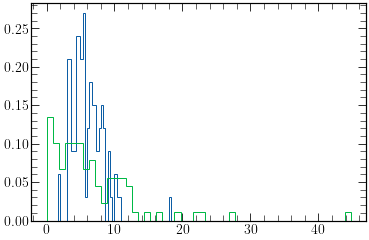

In [78]:
plt.hist(s1, bins=50, histtype='step', density=True)
plt.hist(s2, bins=50, histtype='step', density=True)

## sklearn

In [114]:
from sklearn import linear_model, metrics

In [178]:
s1 = np.random.normal(170, 20, size=50)
s2 = np.random.normal(200, 20, size=50)
tot = np.hstack([s1, s2])
cls = np.hstack([np.zeros_like(s1), np.ones_like(s2)])
h1 = (s1 / 170) * 100
h2 = np.log(s2 / 170) * 100 + 80
tot2 = np.hstack([h1, h2])

X = np.column_stack([tot])

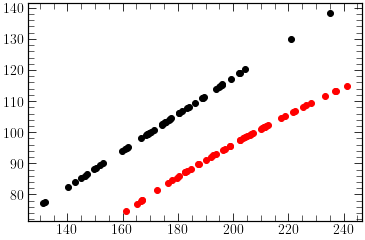

In [179]:
plt.scatter(s1, h1, color='k')
plt.scatter(s2, h2, color='r')

In [180]:
log = linear_model.LogisticRegression()
log.fit(X, cls)

LogisticRegression()

In [181]:
fpr, tpr, thresholds = metrics.roc_curve(cls, log.predict_proba(X)[:, 1])

In [186]:
prob = log.predict_proba(X)[:, 1]

_thres = thresholds[10]

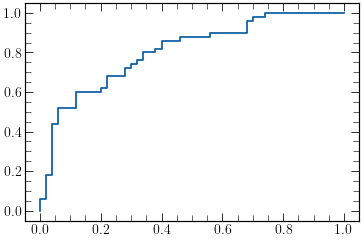

In [210]:
plt.plot(
    1 - np.mean((prob[:, None] < thresholds)[(cls == 0)], axis=0),
    np.mean((prob[:, None] >= thresholds)[cls == 1], axis=0)
)
plt.show()    

(-0.04, 1.04)

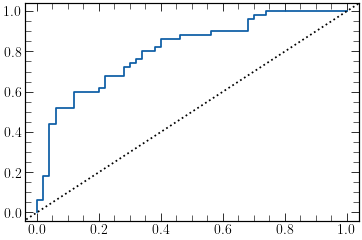

In [182]:
plt.plot(fpr, tpr)
plt.plot([-5, 5], [-5, 5], color='k', ls=':')
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])

In [346]:
C = np.array([
    [3, 1.3, 1.4],
    [1.3, 2.6, 0.45],
    [1.4, 0.45, 1.5]
])
X = np.random.multivariate_normal(np.zeros(3), C, size=(10000))

In [347]:
%%time
U, S, V = np.linalg.svd(X, full_matrices=False)
T = X.dot(V.T)

CPU times: user 1.03 ms, sys: 752 µs, total: 1.79 ms
Wall time: 1.39 ms


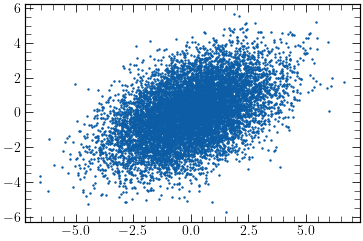

In [348]:
plt.scatter(X[:, 0], X[:, 1], s=2)

(-10.0, 10.0)

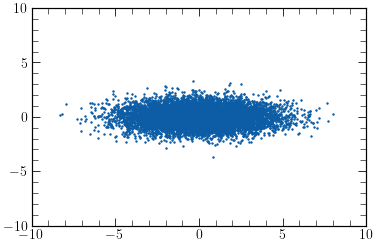

In [353]:
plt.scatter(T[:, 0], T[:, 2], s=2)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

In [350]:
np.cov(X.T)

array([[3.02901186, 1.35647708, 1.39024111],
       [1.35647708, 2.68973819, 0.45720984],
       [1.39024111, 0.45720984, 1.49786003]])

In [356]:
np.linalg.norm(C)

5.07099595740324

In [357]:
np.linalg.norm(np.cov(X[:, :2].T))

4.482149540895698

### Large covariance matrix

In [432]:
from scipy import linalg

In [433]:
N = 100
C = np.random.uniform(0, 1, size=(N, N))
C = (C + C.T) / 2
C[np.diag_indices_from(C)] += np.linspace(10, 5, N)
X = np.random.multivariate_normal(np.zeros(N), C, size=(10000))

In [448]:
%%time
_V, W = linalg.eigh(
    X.T.dot(X), 
    #subset_by_index=[N-5, N-1]
)
T1 = X.dot(W)

CPU times: user 23.5 ms, sys: 4.85 ms, total: 28.3 ms
Wall time: 10.1 ms


In [449]:
%%time
U, S, V = np.linalg.svd(X, full_matrices=False)
T2 = X.dot(V.T[:, :])
T2 = T2[:, ::-1]

CPU times: user 116 ms, sys: 6.83 ms, total: 122 ms
Wall time: 65.1 ms


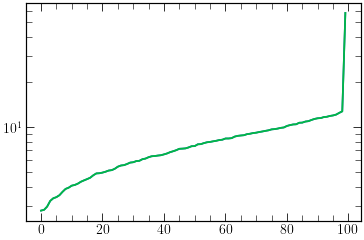

In [458]:
plt.semilogy(np.diag(np.cov(T1.T)))
plt.semilogy((_V / 10000))

In [459]:
s = np.diag(np.cov(T1.T))

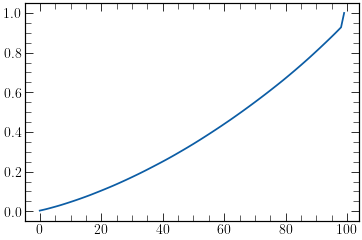

In [460]:
plt.plot(np.cumsum(s) / np.sum(s))